# Using mol_ga:

In [1]:
import joblib
import pandas as pd
from rdkit import Chem
from rdkit.Chem import QED, MolFromSmiles
from rdkit.Chem.Draw import MolsToImage, MolsToGridImage

from mol_ga import mol_libraries, default_ga

## Scoring functions

In [2]:
# mol_ga is designed for batch functions so it inputs a list of SMILES and outputs a list of floats.

### Function to optimize: we choose QED.
f_opt = lambda s_list: [QED.qed(Chem.MolFromSmiles(s)) for s in s_list]

### Constant scoring function (random generation)
# f_opt = lambda s_list: [1.0 for s in s_list]


## Set Starting Molecules:

In [3]:
# Starting molecules: we choose random molecules from ZINC
# (we provide an easy handle for this)
start_smiles = mol_libraries.random_zinc(1000)

In [4]:
pd.DataFrame({"SMILES": start_smiles}).to_csv("./random_zinc_smiles.csv")

### Inspect starting molecules:

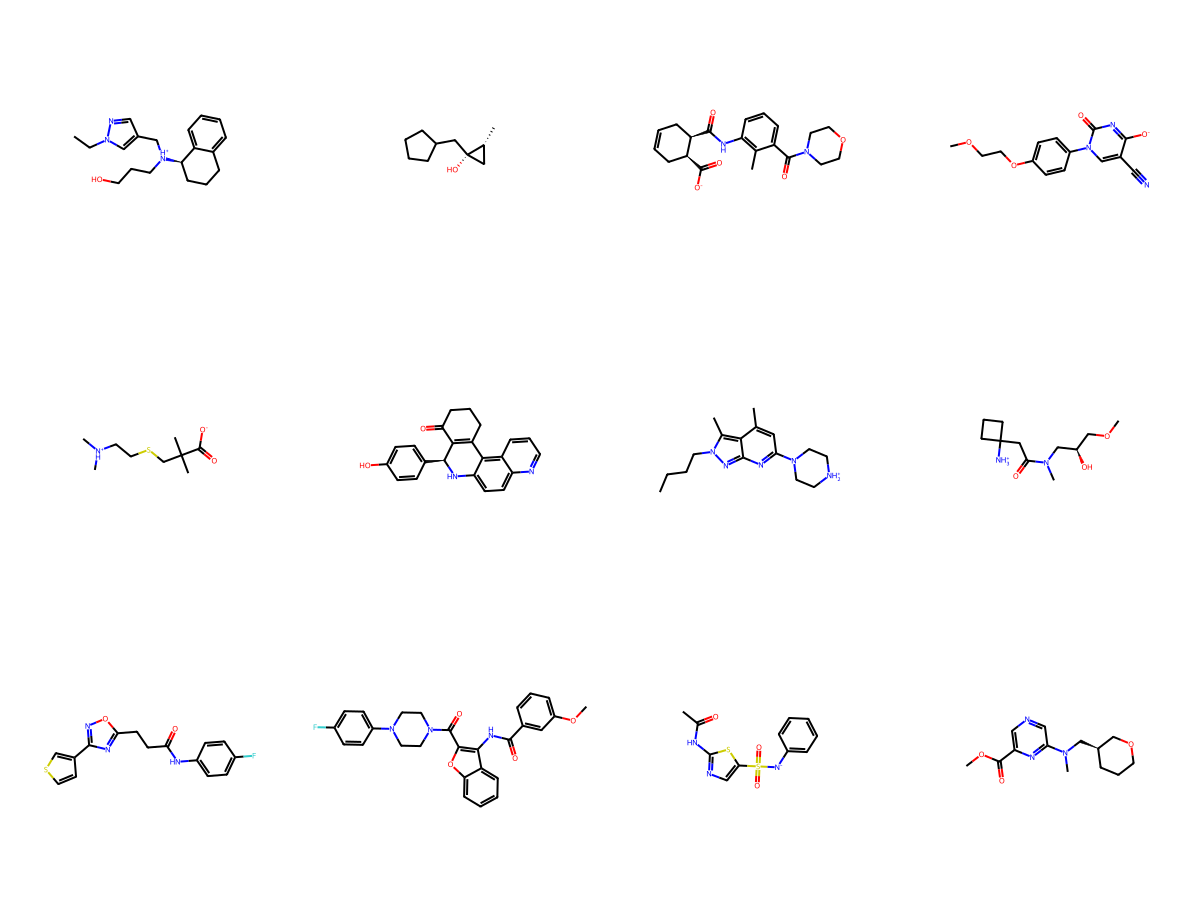

In [16]:
start_mols = [MolFromSmiles(smi) for smi in start_smiles]
MolsToGridImage(start_mols[:12], molsPerRow=4, subImgSize=(300,300))

In [17]:
# Run GA with fast parallel generation
with joblib.Parallel(n_jobs=-1) as parallel:
    ga_results = default_ga(
        starting_population_smiles=start_smiles,
        scoring_function=f_opt,
        max_generations=100,
        offspring_size=100,
        parallel=parallel,
    )

# Print the best molecule
print(max(ga_results.population))

(0.9482068894227501, 'O=C(Nc1ccn(-c2ncccc2Cl)n1)C1=CCC(F)C1')


In [18]:
### CHECK
print(len(ga_results.population))
ga_results.population[:10]

9309


[(0.9482068894227501, 'O=C(Nc1ccn(-c2ncccc2Cl)n1)C1=CCC(F)C1'),
 (0.9482068894227501, 'O=C(Nc1ccn(-c2ncccc2Cl)n1)C1=CC(F)CC1'),
 (0.9481816937534618, 'Cc1cc(F)cnc1-n1ccc(NC(=O)C2=CC(F)CC2)n1'),
 (0.9481663100319406, 'O=C(Nc1ccn(-c2ncccc2Cl)n1)C1=CC(F)C=C1'),
 (0.948134666928046, 'O=C(Nc1ccn(-c2ncc(F)cc2F)n1)C1=CCC(F)=C1'),
 (0.948120931494747, 'Cc1cc(F)cnc1-n1ccc(NC(=O)C2=CCC(F)=C2)n1'),
 (0.9481032691633289, 'CC1=CC=C(C(=O)Nc2ccn(-c3ncc(F)cc3F)n2)C1'),
 (0.9479526331120609, 'Cc1ncccc1-n1ccc(NC(=O)C2C=CC=C2Cl)n1'),
 (0.947841337122475, 'O=C(Nc1ccn(-c2ncccc2Cl)n1)C1=CCC(F)=C1'),
 (0.9477606353312478, 'Cc1ncccc1-n1ccc(NC(=O)C2=CC=C(Cl)C2)n1')]

In [19]:
smiles_results = [result[1] for result in ga_results.population]
mols_results = [MolFromSmiles(smi) for smi in smiles_results]

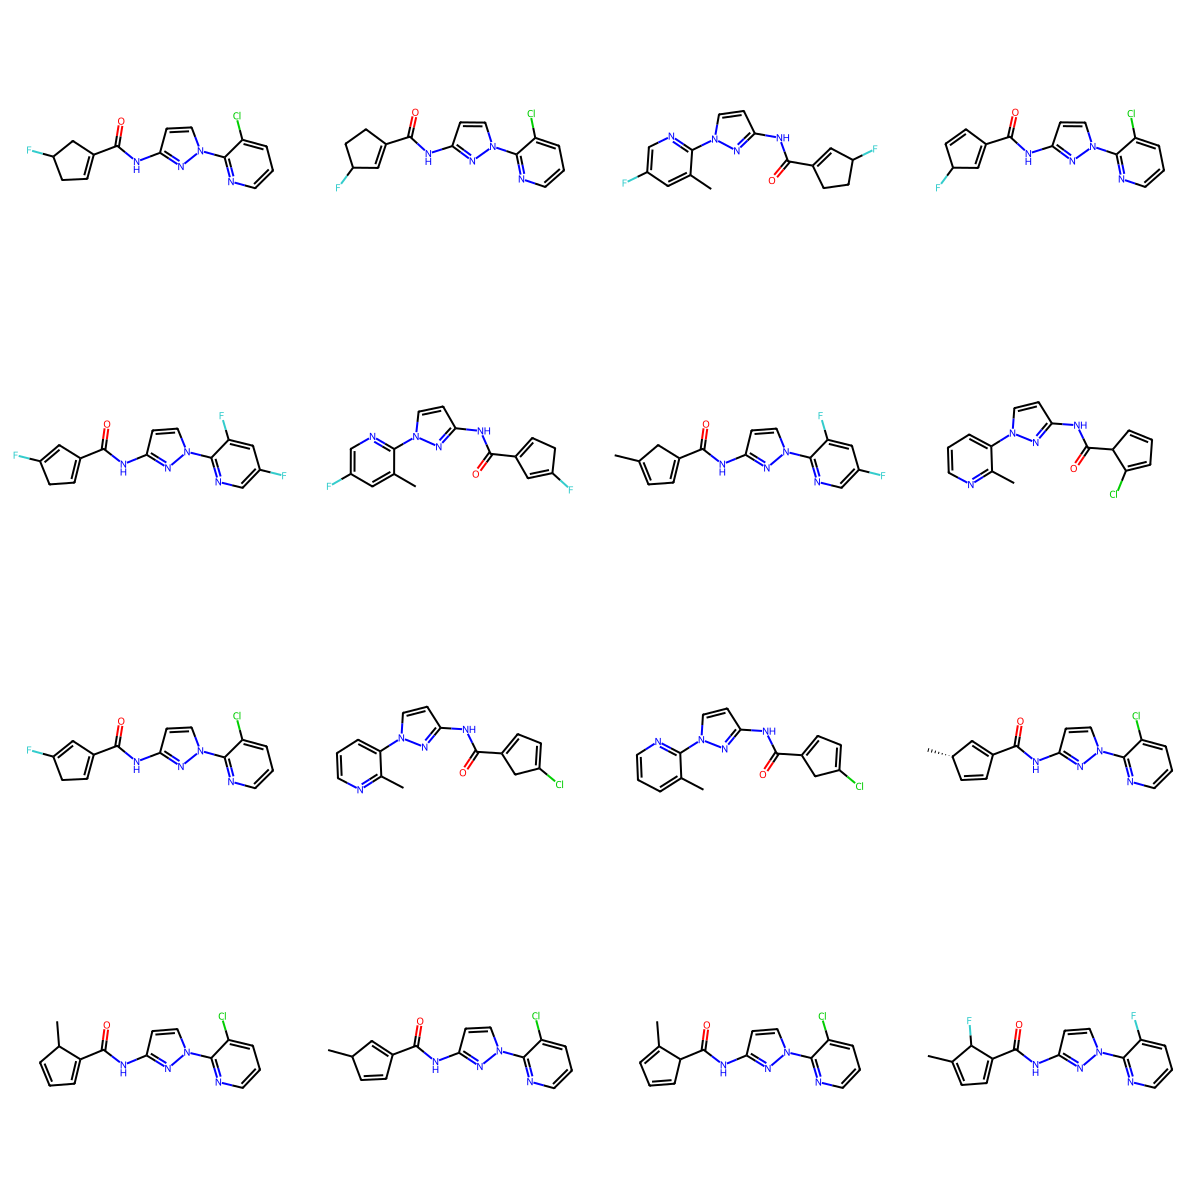

In [20]:
MolsToGridImage(mols_results[:16], molsPerRow=4, subImgSize=(300,300))

## Save to excel file:

In [21]:
# TODO:


## Using another set of starting molecules:

In [ ]:
# Starting molecules: 
smiles_df = pd.read_csv("./.....csv")
start_smiles = smiles_df["SMILES"].to_list()
print(len(start_smiles))